# Clustering: K-means

Clustering es un sistema para encontrar **grupos de datos (clusters)** con alguna **similitud en común**. Los elementos con características similares formarán parte del mismo grupo o cluster, y estarán separados de los demás clusters con los que no comparten características o con los que no serán tan similares.

El clustering se aplica en muchos campos: machine learning, data mining, reconocimiento de patrones, bioinformática, compresión de datos y segmentación de imágenes, entre otros.

Existen muchos métodos de clustering, uno de los más populares es el algoritmo de K-means.

(Nota: clustering "por sí solo" no es un método sino un objetivo a conseguir con un algoritmo)

## K-means

K-means es un método de clustering cuyo objetivo principal es agrupar puntos de datos similares y descubrir patrones subyacentes.

El algoritmo agrupa un conjunto de **𝑛 puntos de entrada en 𝑘 grupos/clusters de salida**, de modo que cada punto se clasifica dentro del clúster que tenga el **valor medio más cercano a él**.

Para calcular el nivel de semejanza entre los puntos de entrada, el algoritmo de K-means utiliza la **distancia entre ellos**, la mayoría de las veces a través del cálculo de la distancia euclídea, aunque se pueden utilizar otras funciones.

El algoritmo en sí es simple y sigue estos pasos:

1. **Inicialización de 𝑘 centroides**: aleatoriamente se eligen 𝑘 puntos aleatorios por ser los centros del clusters.
2. **Asignar** a cada punto de dato al centroide más cercano: se calcula la distancia entre cada centroide y cada punto de dato y se asigna el punto al centroide más cercano.
3. **Actualizar centroides** haciendo la media de cada grupo. El centroide es el punto para el que la suma de distancias entre él y todos los miembros del cluster es mínima.
4. **Volver al punto 2** hasta que lleguemos al criterio de salida (que puede que los centroides no varíen, o bien que hayamos llegado a 𝑥 número de iteraciones).

Al final tendremos 𝑘 clusters. Y cada cluster vendrá definido por sus miembros y su centroide final.

La principal limitación del algoritmo es que el número de clusters resultantes, el valor de la 𝑘, no se calcula automáticamente sino que es un parámetro de entrada del algoritmo (debemos decir nosotros cuántos clusters debe buscar).

In [24]:
from IPython.display import HTML

In [25]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/5I3Ei69I40s?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

In [26]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/BVFG7fd1H30?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [29]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
df = pd.DataFrame(iris['data'])
print(df.head())

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


In [4]:
np.unique(iris['target'])

array([0, 1, 2])

Supongamos que no sabemos el número de clases que hay. Vamos a probar con n = 5:

In [5]:
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(df)

KMeans(n_clusters=5)

In [6]:
kmeanModel.predict([[5.1,  3.5,  1.4,  0.2]])

array([0])

In [7]:
np.unique(iris['target']) # vemos que hay 3 clases distintas de flores

array([0, 1, 2])

Sin información sobre las clases, cómo sabemos qué `k` utilizar: **Método del codo**

`La inercia mide qué tan bien K-Means agrupa un conjunto de datos. Se calcula midiendo la distancia entre cada punto de datos y su centroide, elevando al cuadrado esta distancia y sumando estos cuadrados en un grupo.`

In [34]:
distortions = []
k_list = range(1,10)
for k in k_list:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

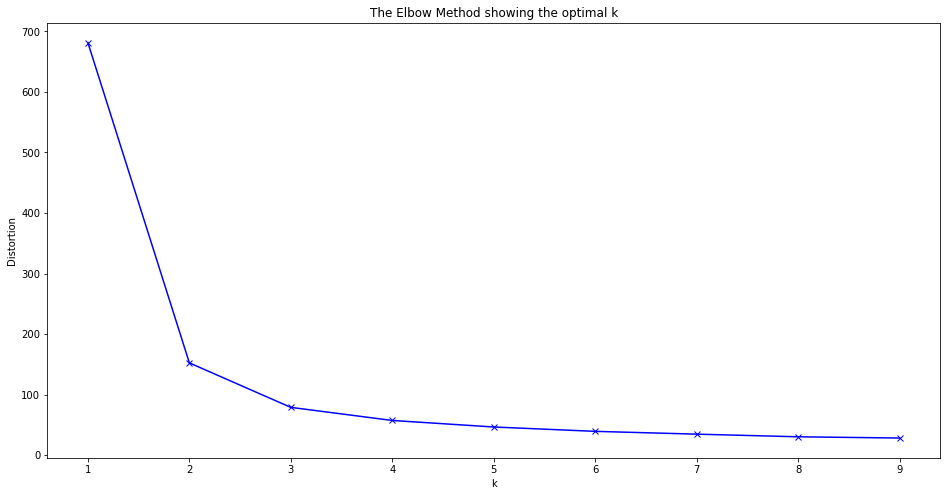

In [36]:
plt.figure(figsize=(16,8))
plt.plot(k_list, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Cuantificación de colores en imágenes Una aplicación de K-means por imágenes es la cuantificación de colores.

La cuantificación de colores es un método para reducir el número total de colores distintos utilizados en una imagen. El objetivo principal es obtener una imagen comprimida lo más similar posible a la imagen original. El factor clave para conseguirlo es elegir aquellos colores que más representen a la imagen original.

La forma más típica de cuantificar colores es a través de algún método de clustering, donde los puntos de entrada son los colores de los píxeles de la imagen y, de cada clúster resultante se escoge el punto más representativo. Una vez tengamos esto, la compresión se basará en remapear todos los colores del clúster en el color del punto representativo del clúster. Vamos a ver un ejemplo interactivo aplicando el método de K-means. Te animamos a probar diferentes valores de 𝑘 para conseguir paletas de colores finales más o menos cuidadosas.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

In [9]:
n_colors = 2

In [10]:
# Load the Summer Palace photo
china = load_sample_image("china.jpg")

In [11]:
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

In [12]:
china.shape

(427, 640, 3)

In [106]:
# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

In [107]:
image_array.shape

(273280, 3)

In [108]:
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")

Fitting model on a small sub-sample of the data
done in 0.036s.


In [109]:
# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")

Predicting color indices on the full image (k-means)
done in 0.010s.


In [110]:
codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")

Predicting color indices on the full image (random)
done in 0.029s.


In [111]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

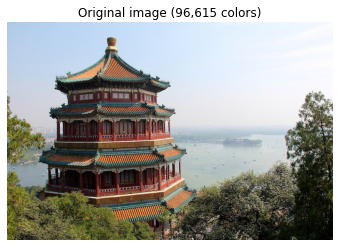

In [112]:
# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(china)
plt.savefig("china.jpg")

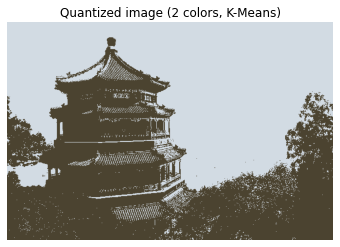

In [113]:
plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

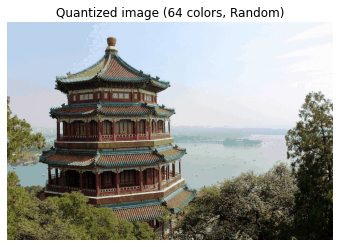

In [65]:
plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

In [23]:
plt.savefig("china_compressed.jpg")

<Figure size 432x288 with 0 Axes>